Laboratorio 2 Grupo 1
Nombre: César Luis Vargas Lezano

Regresión Lineal Multivariable

In [842]:
# Computacion vectorial y cientifica para python
import numpy as np

# Librerias para graficación (trazado de gráfivos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D

# llama a maltplotlib a embeber gráficas dentro de los cuadernillos
%matplotlib inline

# uso de pandas para la lectura de archivos (dataset)
import pandas as pd

In [843]:
#Cargado de dataset
data = pd.read_csv('./kc_house_data.csv')

In [844]:
# Lectura de datos 'sqft_lot','sqft_living','sqft_above' y 'price'
# donde 'sqft_lot': es el tamaño del lote, 
# 'sqft_living':  Metros cuadrados de la zona habitable 
# 'sqft_above': Metros cuadrados de la casa excluyendo el sótano
# 'price': es el precio de la casa
X = data[['sqft_lot','sqft_living','sqft_above']].values
y = data['price'].values
m = y.size

In [845]:
# X.shape es un atributo de los objetos tipo array de NumPy en Python. Este atributo devuelve una tupla que indica las dimensiones del array
X.shape

(21613, 3)

In [846]:
# función normaliza las características de una matriz X para que cada característica tenga una media de 0 y 
# una desviación estándar de 1, lo cual es útil para algoritmos de aprendizaje automático.
def normalizarCaracteristicas(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma
    
    return X_norm, mu, sigma

In [847]:
# para verificar que la normalización de las características se ha realizado correctamente y 
# para ver los valores de la media y la desviación estándar utilizados en el proceso de normalización.
X_norm, mu, sigma = normalizarCaracteristicas(X)

print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

[[ 5650  1180  1180]
 [ 7242  2570  2170]
 [10000   770   770]
 ...
 [ 1350  1020  1020]
 [ 2388  1600  1600]
 [ 1076  1020  1020]]
Media calculada: [15106.96756582  2079.89973627  1788.39069079]
Desviación estandar calculada: [41419.55327263   918.41964938   828.07182019]
[[-0.22832133 -0.97983502 -0.73470764]
 [-0.18988538  0.53363434  0.46084084]
 [-0.12329847 -1.42625404 -1.22983377]
 ...
 [-0.33213703 -1.15404732 -0.92792759]
 [-0.30707641 -0.52252773 -0.22750526]
 [-0.33875227 -1.15404732 -0.92792759]]


In [848]:
# la función graficarDatos crea una gráfica de dispersión con los datos proporcionados y añade etiquetas a los ejes.
def graficarDatos(x, y, xlabel, ylabel):
  fig = pyplot.figure()
  pyplot.plot(x, y, 'ro')
  pyplot.xlabel(xlabel)
  pyplot.ylabel(ylabel)

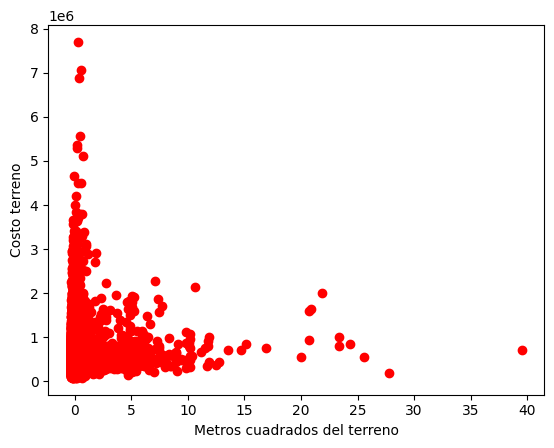

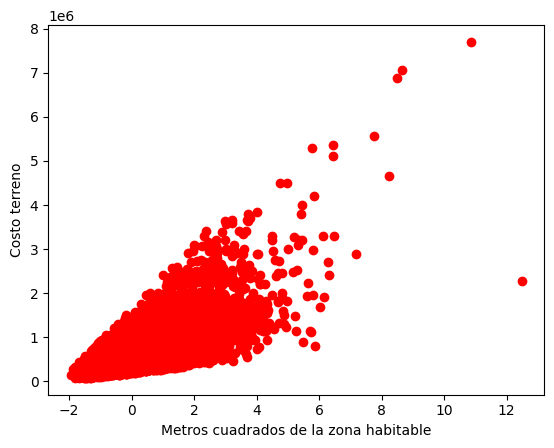

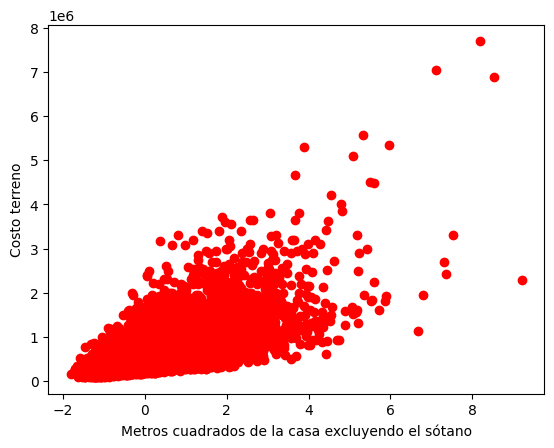

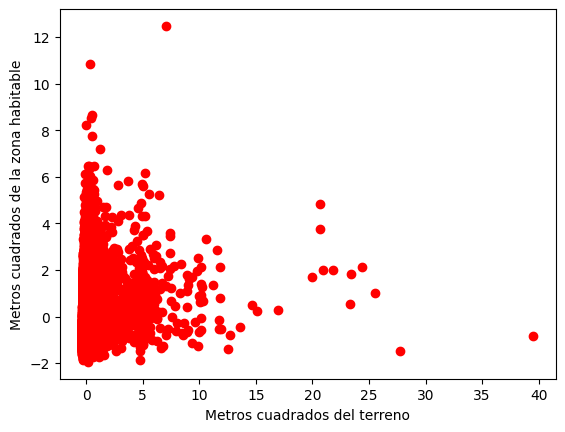

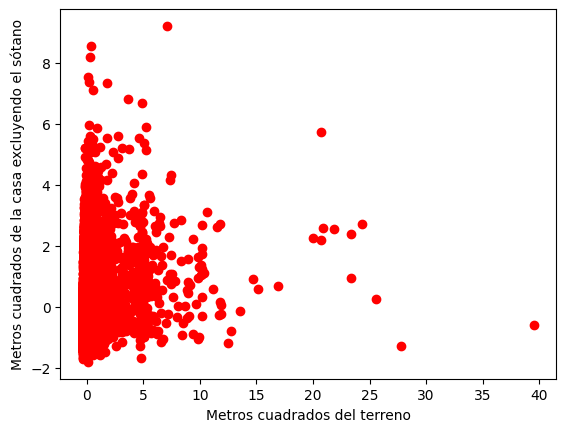

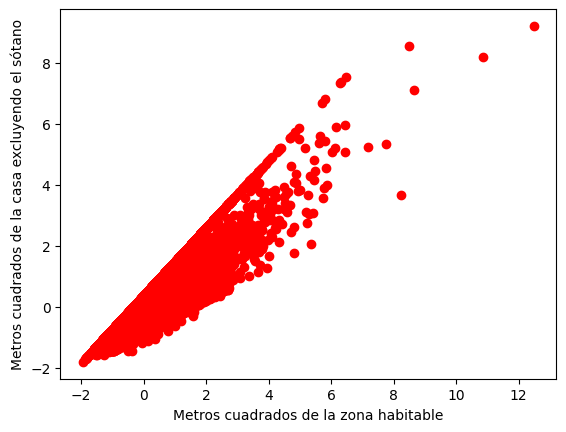

In [849]:
#  crea varias gráficas de dispersión para visualizar la relación entre diferentes características de una casa 
# (como el tamaño del terreno, la zona habitable y la casa excluyendo el sótano) y el costo del terreno.
xlabel1 = "Metros cuadrados del terreno"
xlabel2 = "Metros cuadrados de la zona habitable"
xlabel3 = "Metros cuadrados de la casa excluyendo el sótano"
ylabel1 = "Costo terreno"
graficarDatos(X_norm[:, 0], y, xlabel1, ylabel1)
graficarDatos(X_norm[:, 1], y, xlabel2, ylabel1)
graficarDatos(X_norm[:, 2], y, xlabel3, ylabel1)
graficarDatos(X_norm[:, 0], X_norm[:, 1], xlabel1, xlabel2)
graficarDatos(X_norm[:, 0], X_norm[:, 2], xlabel1, xlabel3)
graficarDatos(X_norm[:, 1], X_norm[:, 2], xlabel2, xlabel3)

In [850]:
#  X_ready es una nueva matriz que resulta de añadir una columna de unos al inicio de la matriz X_norm
X_ready = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [851]:
X_ready

array([[ 1.        , -0.22832133, -0.97983502, -0.73470764],
       [ 1.        , -0.18988538,  0.53363434,  0.46084084],
       [ 1.        , -0.12329847, -1.42625404, -1.22983377],
       ...,
       [ 1.        , -0.33213703, -1.15404732, -0.92792759],
       [ 1.        , -0.30707641, -0.52252773, -0.22750526],
       [ 1.        , -0.33875227, -1.15404732, -0.92792759]])

In [852]:
# esta función calcula el costo (o error) de las predicciones de un modelo de regresión lineal 
# dado un conjunto de datos X, valores objetivo y, y parámetros del modelo theta.
def calcularCosto(X, y, theta):
  m = y.size
  J = 0
  h = np.dot(X, theta)
  # print(h)
  J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
  return J

In [853]:
# Esta función ajusta los parámetros theta para minimizar la función de costo, utilizando el método de descenso por gradiente.
def calcularDescensoGradiente(X, y, theta, alpha, numero_iteraciones):
  m = y.shape[0]
  theta = theta.copy()
  J_historico = []

  for i in range(numero_iteraciones):
    theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
    J_historico.append(calcularCosto(X, y, theta))

  return theta, J_historico

los valores de theta calculados son: [540084.82931927 -11934.60946022 239541.4266661   18536.47368821]
con un costo de: 34213614711.333263 


Text(0, 0.5, 'Costo J')

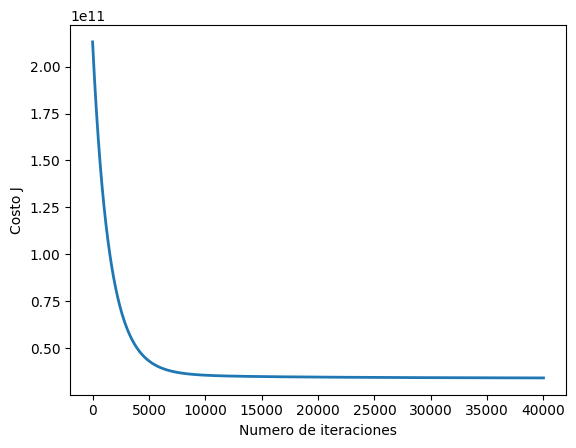

In [854]:
# Inicializa el vector theta con ceros, de tamaño 4
theta = np.zeros(4)

# Define el número de iteraciones para el algoritmo de descenso de gradiente
num_ite = 40000

# Define la tasa de aprendizaje (alpha) para el descenso de gradiente
alpha = 0.0003

# Llama a la función calcularDescensoGradiente con los datos X_ready, y, el vector theta inicial,
# la tasa de aprendizaje y el número de iteraciones. La función devuelve el vector theta optimizado
# y el historial de costos J_historico.
theta, J_historico = calcularDescensoGradiente(X_ready, y, theta, alpha, num_ite)

# Imprime los valores calculados de theta
print(f"los valores de theta calculados son: { theta }")

# Imprime el costo final después de todas las iteraciones
print(f"con un costo de: { J_historico[-1]} ")

# Grafica la convergencia del costo a lo largo de las iteraciones
pyplot.plot(np.arange(len(J_historico)), J_historico, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')


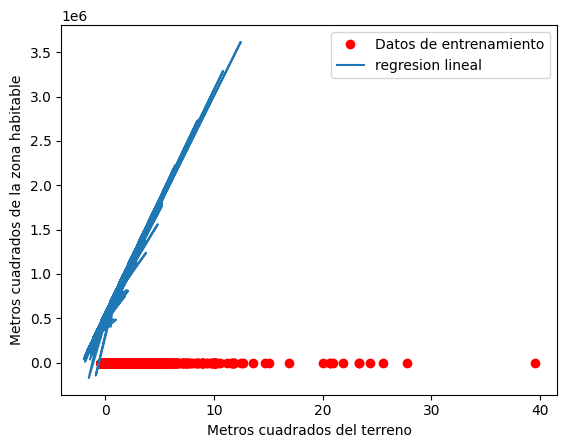

In [855]:
#graficarDatos(X[:, 1], y, xlabel1, ylabel1)
# graficarDatos(X[:, 2], y, xlabel2, ylabel1)
# graficarDatos(X[:, 3], y, xlabel3, ylabel1)
graficarDatos(X_ready[:, 1], X_ready[:, 2], xlabel1, xlabel2)

pyplot.plot(X_ready[:, 2], np.dot(X_ready, theta), '-')


pyplot.legend(['Datos de entrenamiento', 'regresion lineal'])

In [856]:
# Definir los rangos para los valores aleatorios
range1 = (0, 5620)
range2 = (0, 1145)
range3 = (0, 1180)

# Generar 100 predicciones
predictions = []
for _ in range(101):
    valor_aleatorio1 = np.random.uniform(*range1)
    valor_aleatorio2 = np.random.uniform(*range2)
    valor_aleatorio3 = np.random.uniform(*range3)
    X_random = [1, valor_aleatorio1, valor_aleatorio2, valor_aleatorio3]
    y_pred = np.dot(X_random, theta)
    predictions.append(y_pred)
    print(f"Predicción {_ + 1}: ${y_pred}")

# Opcional: Convertir las predicciones a un DataFrame para mejor visualización
predictions_df = pd.DataFrame(predictions, columns=['Predicción'])
print(predictions_df)


Predicción 1: $193931573.1010782
Predicción 2: $209236646.10930693
Predicción 3: $52998127.811883345
Predicción 4: $166379737.59079808
Predicción 5: $66015884.277795345
Predicción 6: $156069018.63121998
Predicción 7: $52351114.615047954
Predicción 8: $-36727038.23937002
Predicción 9: $35336614.955331534
Predicción 10: $148279033.7736045
Predicción 11: $130806202.37456809
Predicción 12: $167166297.28245866
Predicción 13: $94689945.51044746
Predicción 14: $-3790182.914689383
Predicción 15: $172283092.34819016
Predicción 16: $107305549.85996363
Predicción 17: $57998929.99036737
Predicción 18: $92815262.0463253
Predicción 19: $136754150.16612372
Predicción 20: $194327592.48211864
Predicción 21: $24657249.65241
Predicción 22: $39499461.23777089
Predicción 23: $208213294.5860689
Predicción 24: $-28420613.927478008
Predicción 25: $72152472.21452002
Predicción 26: $23755097.297126133
Predicción 27: $184134069.01658604
Predicción 28: $193576042.97894052
Predicción 29: $89796649.91665569
Predicc

In [857]:
def calcularThethaEcuacionNormal(X, y):
    # Inicializa el vector theta con ceros, de tamaño igual al número de características en X
    theta = np.zeros(X.shape[1])
    
    # Calcula theta usando la ecuación normal:
    # theta = (X^T * X)^(-1) * X^T * y
    # np.dot se usa para la multiplicación de matrices y np.linalg.inv para la inversa de una matriz
    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
    
    # Retorna el vector theta calculado
    return theta

In [858]:
# Añade una columna de unos a la matriz X.
# np.ones((m, 1)) crea una matriz de m filas y 1 columna llena de unos.
# np.concatenate une esta columna de unos con la matriz X a lo largo del eje 1 (columnas).
# El resultado es una nueva matriz X_ren que tiene una columna adicional de unos al inicio.
X_ren = np.concatenate([np.ones((m, 1)), X], axis=1)

In [859]:
theta = calcularThethaEcuacionNormal(X_ren, y)
print(f"los valores de theta calculados son: { theta }")


los valores de theta calculados son: [-4.14451236e+04 -2.78184112e-01  2.96151642e+02 -1.69034311e+01]


In [860]:
# Definir los rangos para los valores aleatorios
range1 = (0, 5620)
range2 = (0, 1145)
range3 = (0, 1180)

# Generar 100 predicciones
predictions = []
for _ in range(100):
    valor_aleatorio1 = np.random.uniform(*range1)
    valor_aleatorio2 = np.random.uniform(*range2)
    valor_aleatorio3 = np.random.uniform(*range3)
    X_array = [1, valor_aleatorio1, valor_aleatorio2, valor_aleatorio3]
    price = np.dot(X_array, theta)
    predictions.append(price)
    print(f"El precio de la casa numero {_ + 1} es: ${price}")

# Opcional: Convertir las predicciones a un DataFrame para mejor visualización
predictions_df = pd.DataFrame(predictions, columns=['Predicción'])
print(predictions_df)



El precio de la casa numero 1 es: $148226.96463405038
El precio de la casa numero 2 es: $262869.6096284434
El precio de la casa numero 3 es: $11418.647167288293
El precio de la casa numero 4 es: $117356.09474086139
El precio de la casa numero 5 es: $482.54002198674874
El precio de la casa numero 6 es: $119598.89545058808
El precio de la casa numero 7 es: $100577.12882654596
El precio de la casa numero 8 es: $152506.10255983617
El precio de la casa numero 9 es: $173962.32461600058
El precio de la casa numero 10 es: $31397.071998536492
El precio de la casa numero 11 es: $218315.64210280796
El precio de la casa numero 12 es: $71213.26664423372
El precio de la casa numero 13 es: $130902.35813456183
El precio de la casa numero 14 es: $38858.27625841762
El precio de la casa numero 15 es: $30660.342739956202
El precio de la casa numero 16 es: $45351.45541170667
El precio de la casa numero 17 es: $99913.04206131707
El precio de la casa numero 18 es: $273120.42345213745
El precio de la casa num

Regresion polinomica descenso por el gradiente

[[     5650  31922500]
 [     7242  52446564]
 [    10000 100000000]
 ...
 [     1350   1822500]
 [     2388   5702544]
 [     1076   1157776]]
[[-0.22832133 -0.06364525]
 [-0.18988538 -0.06296202]
 [-0.12329847 -0.06137899]
 ...
 [-0.33213703 -0.06464726]
 [-0.30707641 -0.0645181 ]
 [-0.33875227 -0.06466939]]
[[ 1.         -0.22832133 -0.06364525]
 [ 1.         -0.18988538 -0.06296202]
 [ 1.         -0.12329847 -0.06137899]
 ...
 [ 1.         -0.33213703 -0.06464726]
 [ 1.         -0.30707641 -0.0645181 ]
 [ 1.         -0.33875227 -0.06466939]]
theta calculado por el descenso por el gradiente: [540063.63406056  54608.3525032  -29077.69408016]
El tamaño de un lote de 4523 tiene un precio de: $527971


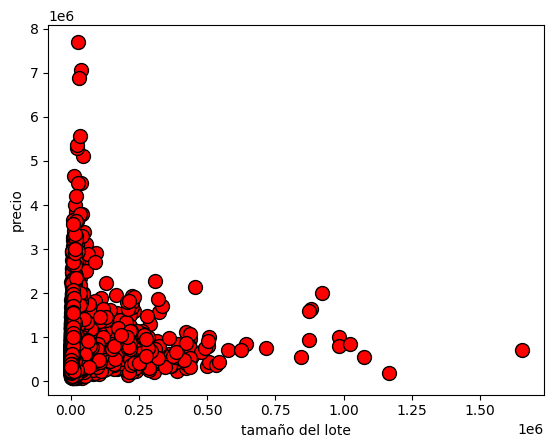

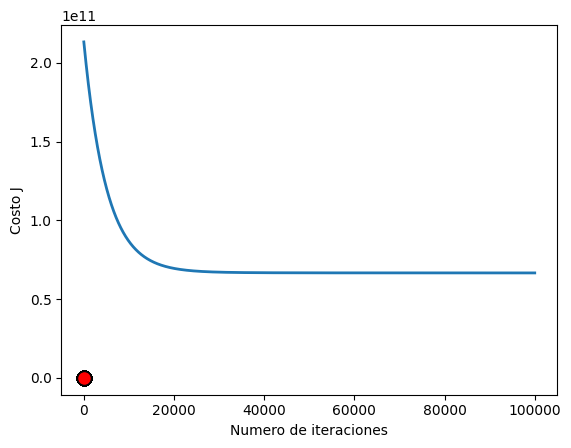

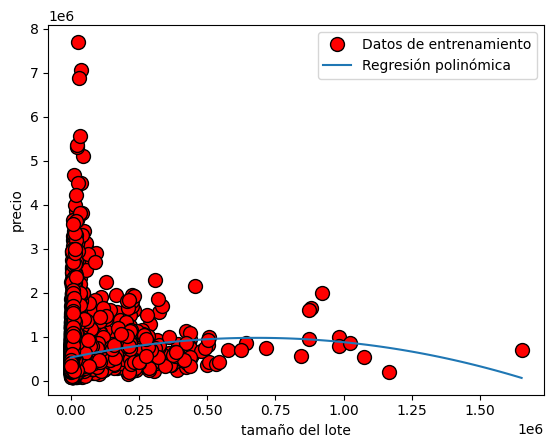

Predicción 1: $854589.18
Predicción 2: $274014.91
Predicción 3: $915181.17
Predicción 4: $916188.05
Predicción 5: $718252.41
Predicción 6: $643044.02
Predicción 7: $747697.65
Predicción 8: $970954.25
Predicción 9: $424851.72
Predicción 10: $896928.47
Predicción 11: $960587.87
Predicción 12: $689836.56
Predicción 13: $762708.14
Predicción 14: $529729.66
Predicción 15: $909533.70
Predicción 16: $671192.76
Predicción 17: $553442.08
Predicción 18: $702956.38
Predicción 19: $337127.05
Predicción 20: $672071.33
Predicción 21: $841588.64
Predicción 22: $746957.30
Predicción 23: $840346.36
Predicción 24: $675221.38
Predicción 25: $808974.70
Predicción 26: $933696.17
Predicción 27: $226543.37
Predicción 28: $817048.70
Predicción 29: $817796.65
Predicción 30: $930127.33
Predicción 31: $970120.25
Predicción 32: $515318.17
Predicción 33: $577486.56
Predicción 34: $912480.00
Predicción 35: $898129.18
Predicción 36: $948124.88
Predicción 37: $741000.03
Predicción 38: $761155.00
Predicción 39: $79548

In [861]:
# Cargar el dataset
data = pd.read_csv('./kc_house_data.csv')  # Lectura de datos 'sqft_lot'
# donde 'sqft_lot': es el tamaño del lote, 
# 'price': es el precio de la casa
X = data['sqft_lot'].values
y = data['price'].values
m = y.size

def plotData(x, y):
    # Grafica los puntos x e y en una figura nueva.
    fig = plt.figure()  # abre una nueva figura
    pyplot.plot(x, y, 'ro', ms=10, mec='k')
    pyplot.ylabel('precio')
    pyplot.xlabel('tamaño del lote')

plotData(X, y)

# Generar características polinómicas de segundo grado
X_poly = np.concatenate([X.reshape(-1, 1), (X * X).reshape(-1, 1)], axis=1)
print(X_poly)

def featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

# Llama featureNormalize con los datos cargados
X_poly_norm, mu, sigma = featureNormalize(X_poly)
print(X_poly_norm)
plotData(X_poly_norm[:, 0], y)  # Graficar la primera característica normalizada

# Añade el término de intersección a X (Columna de unos para X0)
X_poly_ready = np.concatenate([np.ones((m, 1)), X_poly_norm], axis=1)
print(X_poly_ready)

def computeCostMulti(X, y, theta):
    # Inicializa algunos valores útiles
    m = y.shape[0]  # número de ejemplos de entrenamiento
    J = 0
    h = np.dot(X, theta)
    J = (1 / (2 * m)) * np.sum(np.square(h - y))
    return J

def gradientDescentMulti(X, y, theta, alpha, num_iters):
    # Inicializa algunos valores
    m = y.shape[0]  # número de ejemplos de entrenamiento
    theta = theta.copy()  # realiza una copia de theta, el cual será actualizado por el descenso por el gradiente
    J_history = []

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history

# Elegir algún valor para alpha (probar varias alternativas)
alpha = 0.0001
num_iters = 100000

# Inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(X_poly_ready.shape[1])
theta, J_history = gradientDescentMulti(X_poly_ready, y, theta, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# El precio de una casa de 4523$ y 1156 metros cuadrados
X_array = [1, 4523, 4523**2]
X_array[1:3] = (X_array[1:3] - mu) / sigma
price = np.dot(X_array, theta)

print('El tamaño de un lote de 4523 tiene un precio de: ${:.0f}'.format(price))

# Generar puntos para la curva ajustada
x_vals = np.linspace(min(X), max(X), 100)
x_vals_poly = np.concatenate([x_vals.reshape(-1, 1), (x_vals * x_vals).reshape(-1, 1)], axis=1)
x_vals_poly_norm = (x_vals_poly - mu) / sigma
x_vals_poly_ready = np.concatenate([np.ones((x_vals_poly_norm.shape[0], 1)), x_vals_poly_norm], axis=1)

# Calcular las predicciones
y_vals = np.dot(x_vals_poly_ready, theta)

# Graficar los datos originales
pyplot.figure()
pyplot.plot(X, y, 'ro', ms=10, mec='k')
pyplot.ylabel('precio')
pyplot.xlabel('tamaño del lote')

# Graficar la curva ajustada
pyplot.plot(x_vals, y_vals, '-')
pyplot.legend(['Datos de entrenamiento', 'Regresión polinómica'])
pyplot.show()

# Generar 100 predicciones con datos aleatorios
range1 = (min(X), max(X))
predictions = []
for _ in range(101):
    valor_aleatorio = np.random.uniform(*range1)
    X_random = [1, valor_aleatorio, valor_aleatorio**2]
    X_random[1:3] = (X_random[1:3] - mu) / sigma
    y_pred = np.dot(X_random, theta)
    predictions.append(y_pred)
    print(f"Predicción {_ + 1}: ${y_pred:.2f}")

# Opcional: Convertir las predicciones a un DataFrame para mejor visualización
predictions_df = pd.DataFrame(predictions, columns=['Predicción'])
print(predictions_df)

Regresion lineal polinomica por ecuacion de la normal

los valores de theta calculados son: [540088.14176653  60281.77013328 -34751.11127022]


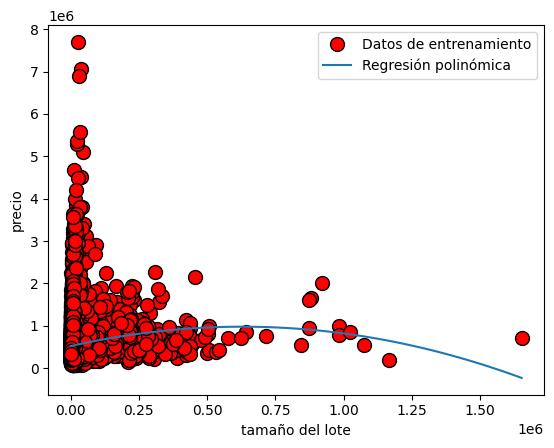

Predicción 1: $967742.71
Predicción 2: $796283.65
Predicción 3: $658125.47
Predicción 4: $68785.66
Predicción 5: $972979.49
Predicción 6: $945446.07
Predicción 7: $-173958.02
Predicción 8: $567616.90
Predicción 9: $651744.48
Predicción 10: $851202.89
Predicción 11: $759306.24
Predicción 12: $779255.92
Predicción 13: $828259.42
Predicción 14: $551246.39
Predicción 15: $442627.77
Predicción 16: $18073.42
Predicción 17: $548056.44
Predicción 18: $676004.17
Predicción 19: $572821.88
Predicción 20: $935334.86
Predicción 21: $975874.28
Predicción 22: $721945.39
Predicción 23: $564144.67
Predicción 24: $921112.50
Predicción 25: $54948.65
Predicción 26: $12822.22
Predicción 27: $553313.30
Predicción 28: $363593.92
Predicción 29: $872505.41
Predicción 30: $744597.29
Predicción 31: $383247.07
Predicción 32: $935152.20
Predicción 33: $821141.35
Predicción 34: $-30818.13
Predicción 35: $322338.33
Predicción 36: $748553.52
Predicción 37: $-207789.12
Predicción 38: $114787.73
Predicción 39: $616488.

In [862]:
# Cargar el dataset
data = pd.read_csv('./kc_house_data.csv')
X = data['sqft_lot'].values
y = data['price'].values
m = y.size

# Generar características polinómicas de segundo grado
X_poly = np.concatenate([X.reshape(-1, 1), (X * X).reshape(-1, 1)], axis=1)

# Normalizar las características
def featureNormalize(X):
    X_norm = X.copy()
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

X_poly_norm, mu, sigma = featureNormalize(X_poly)

# Añadir el término de intersección
X_poly_ready = np.concatenate([np.ones((m, 1)), X_poly_norm], axis=1)

# Ajustar el modelo usando la ecuación normal
def calcularThethaEcuacionNormal(X, y):
    theta = np.zeros(X.shape[1])
    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
    return theta

theta = calcularThethaEcuacionNormal(X_poly_ready, y)
print(f"los valores de theta calculados son: {theta}")

# Graficar los datos originales
def plotData(x, y):
    pyplot.figure()
    pyplot.plot(x, y, 'ro', ms=10, mec='k')
    pyplot.ylabel('precio')
    pyplot.xlabel('tamaño del lote')

plotData(X, y)

# Generar puntos para la curva ajustada
x_vals = np.linspace(min(X), max(X), 100)
x_vals_poly = np.concatenate([x_vals.reshape(-1, 1), (x_vals * x_vals).reshape(-1, 1)], axis=1)
x_vals_poly_norm = (x_vals_poly - mu) / sigma
x_vals_poly_ready = np.concatenate([np.ones((x_vals_poly_norm.shape[0], 1)), x_vals_poly_norm], axis=1)

# Calcular las predicciones
y_vals = np.dot(x_vals_poly_ready, theta)

# Graficar la curva ajustada
pyplot.plot(x_vals, y_vals, '-')
pyplot.legend(['Datos de entrenamiento', 'Regresión polinómica'])
pyplot.show()

# Generar 100 predicciones con datos aleatorios
range1 = (min(X), max(X))
predictions = []
for _ in range(100):
    valor_aleatorio = np.random.uniform(*range1)
    X_random = [1, valor_aleatorio, valor_aleatorio**2]
    X_random[1:3] = (X_random[1:3] - mu) / sigma
    y_pred = np.dot(X_random, theta)
    predictions.append(y_pred)
    print(f"Predicción {_ + 1}: ${y_pred:.2f}")

# Opcional: Convertir las predicciones a un DataFrame para mejor visualización
predictions_df = pd.DataFrame(predictions, columns=['Predicción'])
print(predictions_df)